In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import cv2
import dlib
import numpy as np
from fastai.vision import *

In [ ]:
!unzip "data_emotion.zip"  -d "/content"

In [ ]:
path = Path('/content/data_emotion')

In [ ]:
path.ls()

[PosixPath('/content/data_emotion/train'),
 PosixPath('/content/data_emotion/valid')]

In [ ]:
data = (ImageList.from_folder(path) #Where to find the data? -> in path and its subfolders
        .split_by_folder()              #How to split in train/valid? -> use the folders
        .label_from_folder()            #How to label? -> depending on the folder of the filenames
        .transform(get_transforms(max_zoom=1, max_warp=0.05, max_rotate=0.05, max_lighting=0.2), size=(224,224))      #Data augmentation? -> use tfms with a size of 64
        .databunch(bs=64,num_workers=12)
        .normalize(imagenet_stats)) 

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)


In [ ]:
learn.freeze_to(-1)

In [ ]:
learn.fit_one_cycle(7,1e-3, div_factor=25, pct_start=0.3,wd=2)

epoch,train_loss,valid_loss,accuracy,time
0,1.698687,1.369926,0.493921,00:21
1,1.308425,0.792164,0.674772,00:21
2,0.972580,0.679027,0.715805,00:21
3,0.738903,0.597190,0.765957,00:21
4,0.578919,0.556791,0.779635,00:21
5,0.470057,0.547592,0.782675,00:21
6,0.428507,0.553496,0.784195,00:21


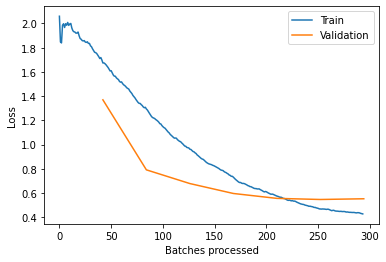

In [ ]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


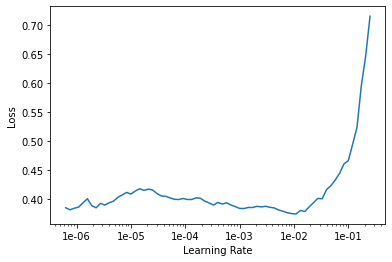

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-3,1e-2),wd = 2)

epoch,train_loss,valid_loss,accuracy,time
0,0.451636,0.978527,0.696049,00:23
1,0.385484,0.707438,0.752280,00:23
2,0.408605,0.583745,0.800912,00:23
3,0.382009,0.563061,0.761398,00:23
4,0.377135,0.562812,0.770517,00:23
5,0.375155,0.417700,0.844985,00:23
6,0.326658,0.426703,0.837386,00:23
7,0.274033,0.412133,0.840426,00:23
8,0.225805,0.364381,0.866261,00:23
9,0.179777,0.358958,0.881459,00:23


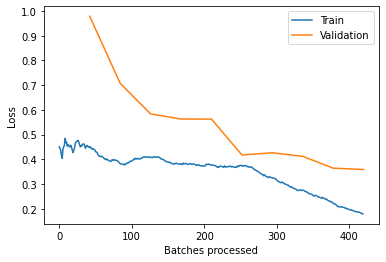

In [ ]:
learn.recorder.plot_losses()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

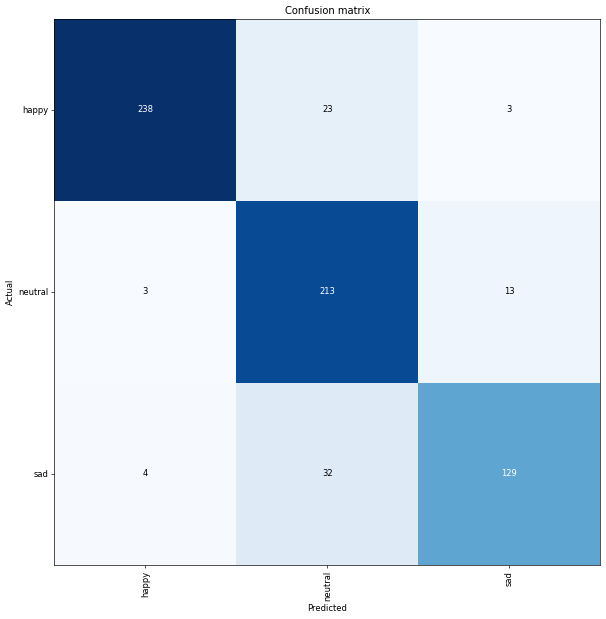

In [ ]:
interp.plot_confusion_matrix(figsize=(10,12), dpi=60)

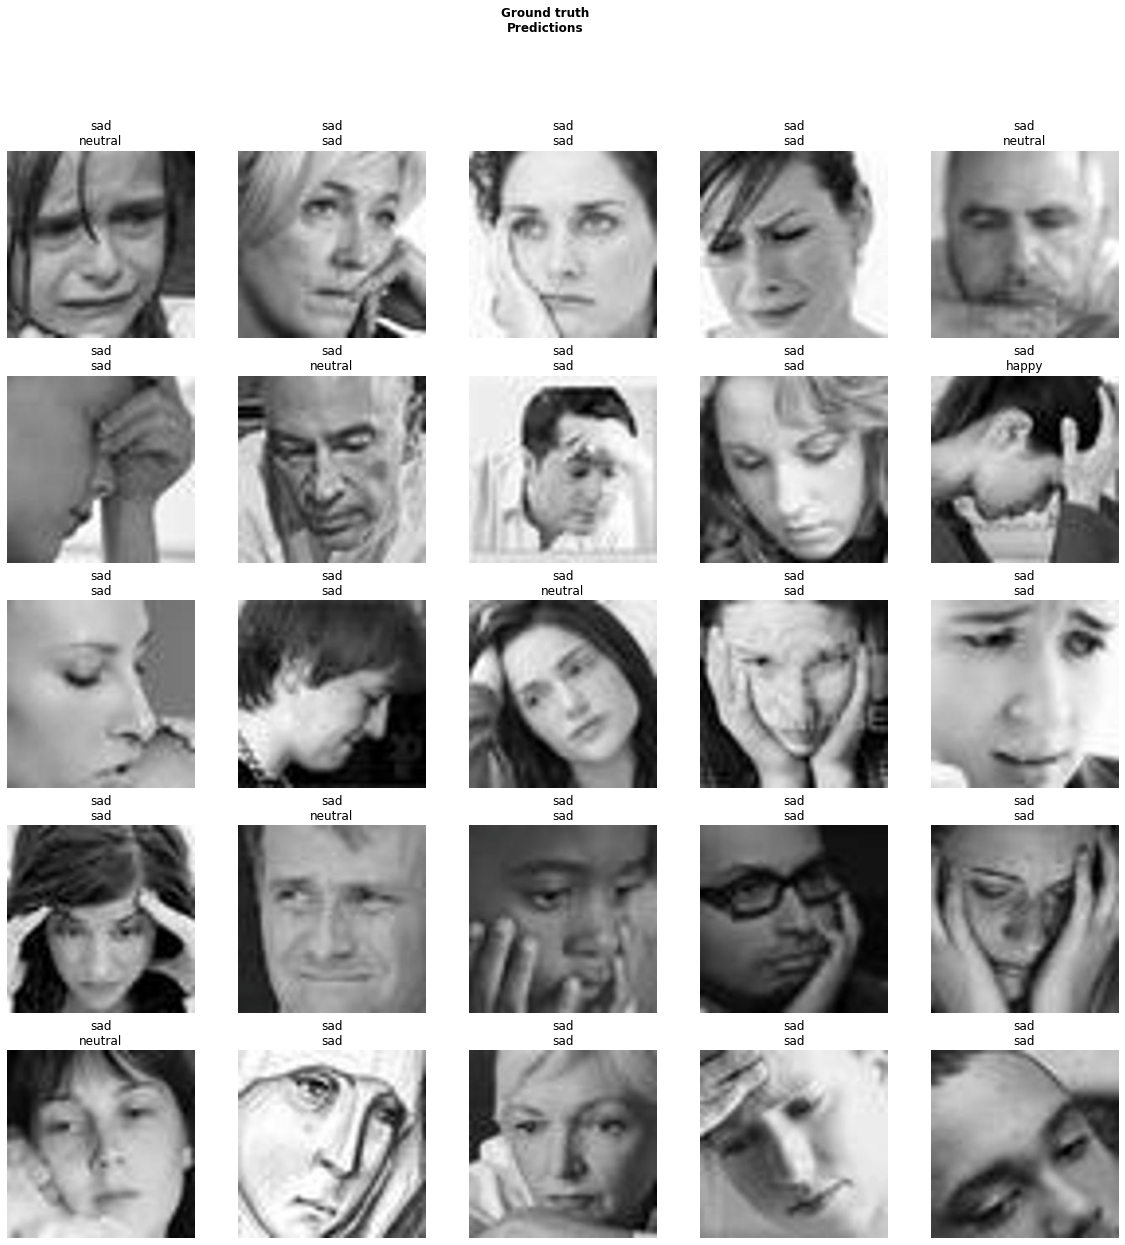

In [ ]:
learn.show_results()

In [ ]:
data_test = ImageDataBunch.from_folder(path, train="train", valid='test',
        ds_tfms=get_transforms(), num_workers=4).normalize(imagenet_stats)

In [ ]:
learn.export("emotion.pkl")